<a href="https://colab.research.google.com/github/AbhishekAbsy0710/FDA_SetExercise/blob/main/Time_Series_Forecasting_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few rows of data:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


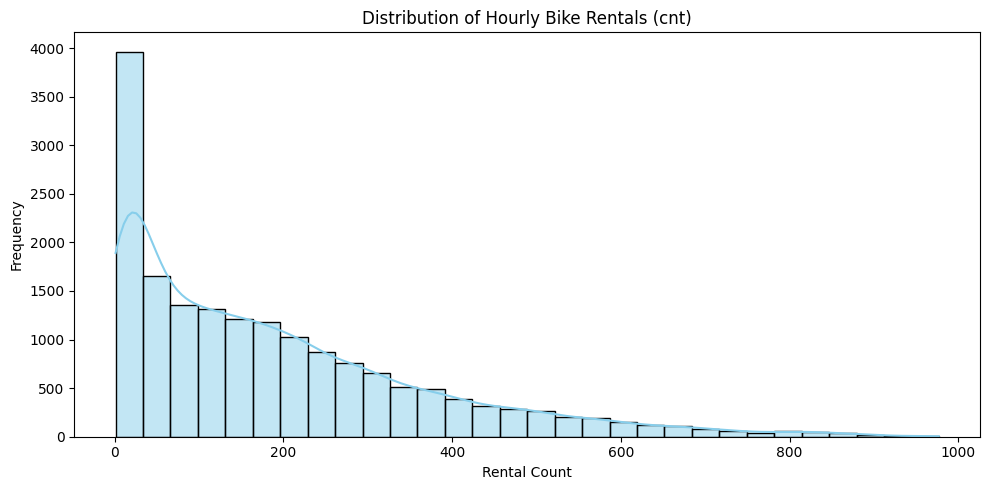

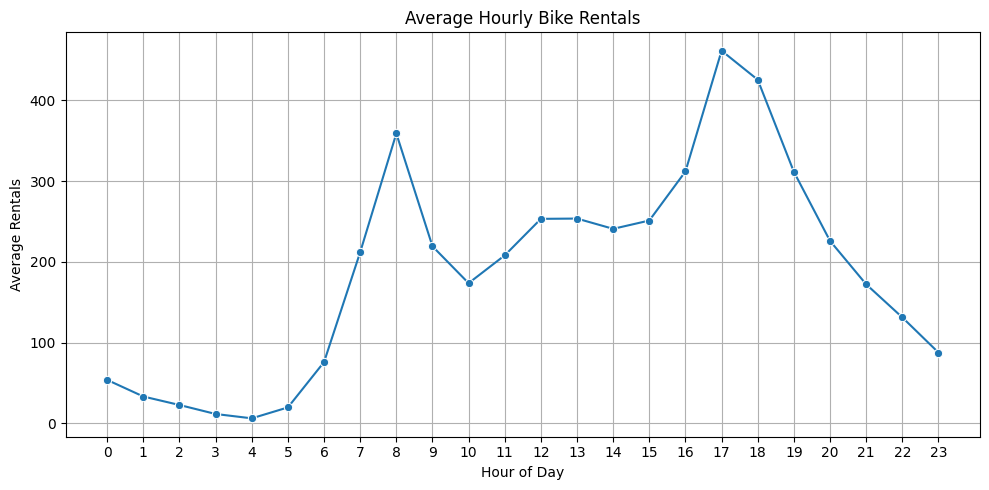

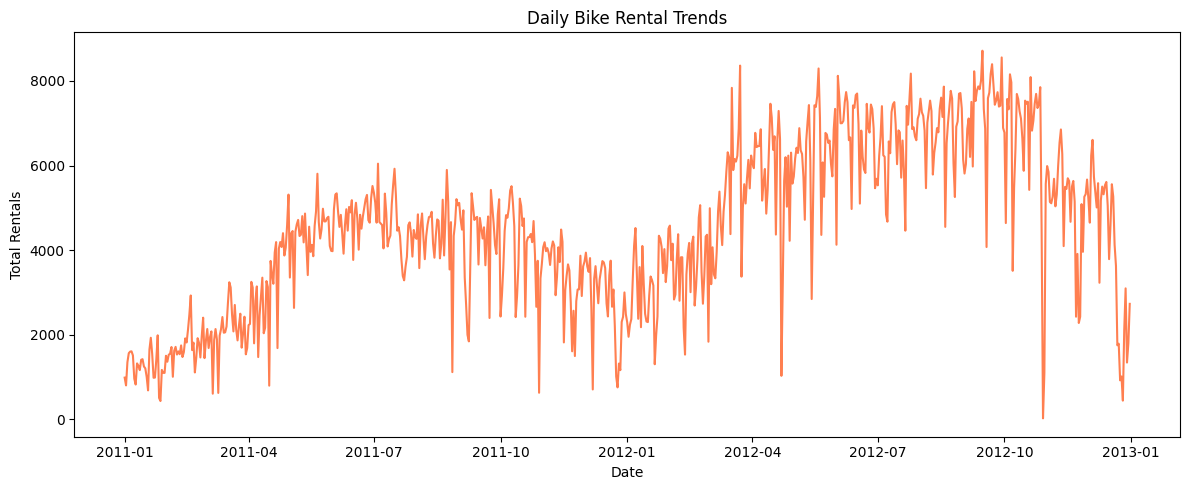


Summary Statistics:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [2]:
# import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from lightgbm import LGBMRegressor
import xgboost as xgb
import seaborn as sns


# Reload dataset
df = pd.read_csv("/content/hour.csv")

print("First few rows of data:")
display(df.head())
# Convert 'dteday' string to datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Plot 1: Distribution of target variable 'cnt'
print("\n")
plt.figure(figsize=(10, 5))
sns.histplot(df['cnt'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Hourly Bike Rentals (cnt)')
plt.xlabel('Rental Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot 2: Average rentals by hour
print("\n")
hr_avg = df.groupby('hr')['cnt'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=hr_avg.index, y=hr_avg.values, marker='o')
plt.title('Average Hourly Bike Rentals')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3: Trend of rentals over time
print("\n")
plt.figure(figsize=(12, 5))
df_daily = df.groupby('dteday')['cnt'].sum().reset_index()
sns.lineplot(data=df_daily, x='dteday', y='cnt', color='coral')
plt.title('Daily Bike Rental Trends')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.tight_layout()
plt.show()

# Summary statistics
print("\nSummary Statistics:")
display(df.describe())


In [3]:
# missing values
df.isnull().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


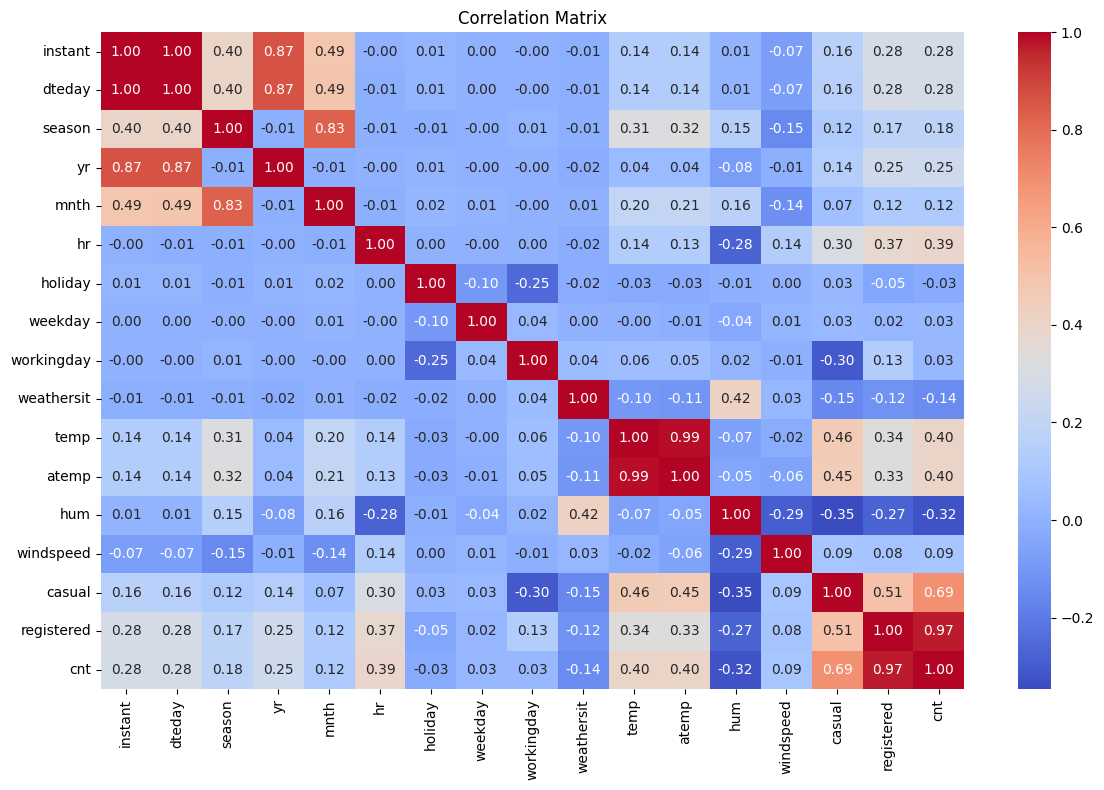

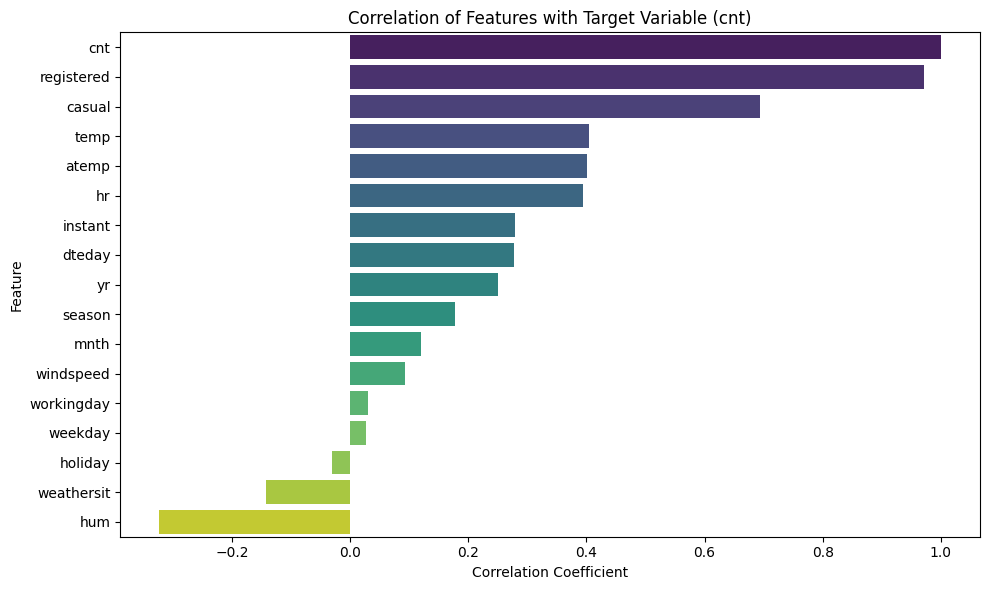


Correlation with respect to total bike rental:
 cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
dteday        0.277753
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

Best features with respect to total bike rental:
 temp    0.404772
hr      0.394071
Name: cnt, dtype: float64


In [4]:
#plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

corr = df.corr()
corr_cnt = corr['cnt'].sort_values(ascending=False)

#plot correlation using bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_cnt.values,y=corr_cnt.index,hue=corr_cnt.index,palette='viridis',dodge=False,legend=False)
plt.title('Correlation of Features with Target Variable (cnt)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


print("\nCorrelation with respect to total bike rental:\n",corr_cnt)

best_features = corr_cnt[['temp','hr']]
print("\nBest features with respect to total bike rental:\n",best_features)

Q1: 40.0
Q3: 281.0
IQR: 241.0
Lower Bound (IQR): -321.5
Upper Bound (IQR): 642.5


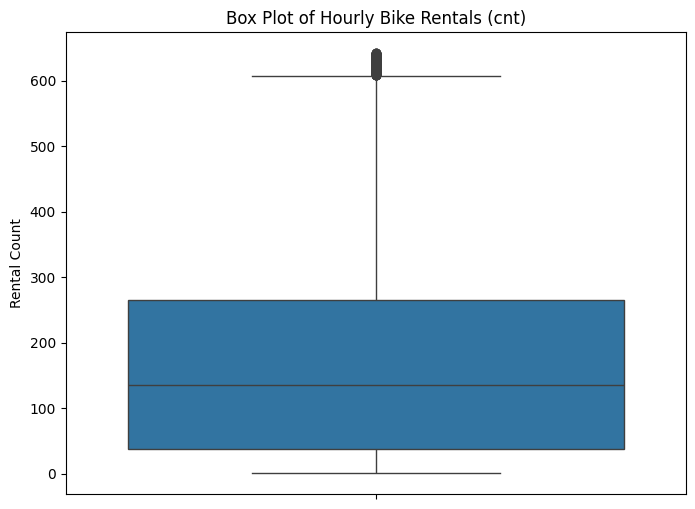

In [5]:
# Calculate IQR
Q1 = df['cnt'].quantile(0.25)
Q3 = df['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['cnt'] >= lower_bound) & (df['cnt'] <= upper_bound)].copy()

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound (IQR): {lower_bound}")
print(f"Upper Bound (IQR): {upper_bound}")

# Visualize with box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['cnt'])
plt.title('Box Plot of Hourly Bike Rentals (cnt)')
plt.ylabel('Rental Count')
plt.show()

In [6]:
# seperating weekdays, weekends etc for time trends
df['hour'] = df['hr']
df['day'] = pd.to_datetime(df['dteday']).dt.day
df['weekday'] = pd.to_datetime(df['dteday']).dt.weekday
df['month'] = pd.to_datetime(df['dteday']).dt.month
df['year'] = pd.to_datetime(df['dteday']).dt.year

#dropping unwanted columns
df_model = df.drop(columns=['instant', 'dteday', 'casual','hr','mnth','yr','atemp'])

df_model.head()

,season,holiday,weekday,workingday,weathersit,temp,hum,windspeed,registered,cnt,hour,day,month,year
0,1,0,5,0,1,0.24,0.81,0.0,13,16,0,1,1,2011
1,1,0,5,0,1,0.22,0.80,0.0,32,40,1,1,1,2011
2,1,0,5,0,1,0.22,0.80,0.0,27,32,2,1,1,2011
3,1,0,5,0,1,0.24,0.75,0.0,10,13,3,1,1,2011
4,1,0,5,0,1,0.24,0.75,0.0,1,1,4,1,1,2011



Top Correlated Features with 'cnt':
registered    0.967572
hour          0.420853
temp          0.401579
hum          -0.326973
year          0.191555
Name: cnt, dtype: float64




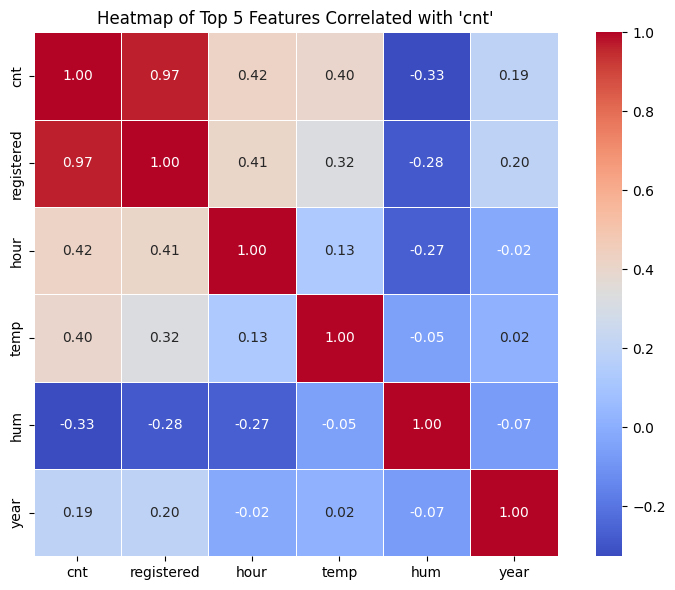

In [7]:
# Calculate correlation of all features with the target
correlations = df_model.corr()['cnt'].drop('cnt')  # drop 'cnt' itself
top_features = correlations.abs().sort_values(ascending=False).head(5).index.tolist()

print("\nTop Correlated Features with 'cnt':")
print(correlations[top_features])

top_n = 5
top_corr = df_model.corr()['cnt'].abs().sort_values(ascending=False).head(top_n + 1).index  # +1 to include 'cnt' itself
top_corr_matrix = df_model[top_corr].corr()

print("\n")
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(top_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title(f"Heatmap of Top {top_n} Features Correlated with 'cnt'")
plt.tight_layout()
plt.show()


In [8]:
# dropping registered feature
df_model = df.drop(columns=['instant', 'dteday', 'casual','hr','mnth','yr','atemp','registered'])
df_model.head()

,season,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,hour,day,month,year
0,1,0,5,0,1,0.24,0.81,0.0,16,0,1,1,2011
1,1,0,5,0,1,0.22,0.80,0.0,40,1,1,1,2011
2,1,0,5,0,1,0.22,0.80,0.0,32,2,1,1,2011
3,1,0,5,0,1,0.24,0.75,0.0,13,3,1,1,2011
4,1,0,5,0,1,0.24,0.75,0.0,1,4,1,1,2011


In [9]:
#normalize or standardize columns
to_scale = ['temp', 'hum', 'windspeed']
scaler = StandardScaler()
df_model[to_scale] = scaler.fit_transform(df_model[to_scale])
df_model.head()

,season,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,hour,day,month,year
0,1,0,5,0,1,-1.312812,0.932465,-1.548465,16,0,1,1,2011
1,1,0,5,0,1,-1.416735,0.880542,-1.548465,40,1,1,1,2011
2,1,0,5,0,1,-1.416735,0.880542,-1.548465,32,2,1,1,2011
3,1,0,5,0,1,-1.312812,0.620929,-1.548465,13,3,1,1,2011
4,1,0,5,0,1,-1.312812,0.620929,-1.548465,1,4,1,1,2011


In [10]:
import warnings
warnings.filterwarnings('ignore')
# Features and target
X = df_model.drop(['cnt','day'], axis=1)
y = df_model['cnt']

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=42)

# Second split: Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False, random_state=42)

# Initialize models
rf = RandomForestRegressor(random_state=42)
xgbr = xgb.XGBRegressor(random_state=42)
lgbm = LGBMRegressor(random_state=42, verbose=-1)

# Train models
rf.fit(X_train, y_train)
xgbr.fit(X_train, y_train)
lgbm.fit(X_train, y_train)


# Evaluate function
def evaluate_model(model, X, y, name="Model"):
    pred = model.predict(X)
    mae = mean_absolute_error(y, pred)
    mse = mean_squared_error(y, pred)
    r2 = r2_score(y, pred)
    rmse = np.sqrt(mse)
    print(f"{name} Evaluation:")
    print("MAE:", mae)
    print("MSE:", mse)
    print("R²:", r2)
    print("RMSE:", rmse)
    print()
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

# Evaluation
eval_models_table = pd.DataFrame([
    evaluate_model(rf, X_test, y_test, "Random Forest Regressor"),
    evaluate_model(xgbr, X_test, y_test, "XGBoost Regressor"),
    evaluate_model(lgbm, X_test, y_test, "LGBM Regressor")
])

eval_models_table.index = ['Random Forest Regressor', 'XGBoost Regressor', 'LGBM Regressor']
eval_models_table

Random Forest Regressor Evaluation:
MAE: 45.15031259873618
MSE: 4320.874570205864
R²: 0.8497714989124112
RMSE: 65.73335964490073

XGBoost Regressor Evaluation:
MAE: 42.9033317565918
MSE: 4013.22265625
R²: 0.8604679703712463
RMSE: 63.350001233228085

LGBM Regressor Evaluation:
MAE: 43.085010544429785
MSE: 4051.6025631921793
R²: 0.8591335688686759
RMSE: 63.65219998705606



,MAE,MSE,RMSE,R2
Random Forest Regressor,45.150313,4320.874570,65.733360,0.849771
XGBoost Regressor,42.903332,4013.222656,63.350001,0.860468
LGBM Regressor,43.085011,4051.602563,63.652200,0.859134


In [11]:
# Initialize models with example hyperparameters
rf_model_1 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model_2 = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)

xgbr_model_1 = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgbr_model_2 = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)

lgbm_model_1 = LGBMRegressor(n_estimators=100, num_leaves=31, random_state=42, verbose = -1)
lgbm_model_2 = LGBMRegressor(n_estimators=200, num_leaves=50, random_state=42, verbose = -1)

# Train models on the training set
rf_model_1.fit(X_train, y_train)
rf_model_2.fit(X_train, y_train)
xgbr_model_1.fit(X_train, y_train)
xgbr_model_2.fit(X_train, y_train)
lgbm_model_1.fit(X_train, y_train)
lgbm_model_2.fit(X_train, y_train)


# Evaluate models on the validation set
print("--- Evaluation on Validation Set ---")
rf1 = evaluate_model(rf_model_1, X_val, y_val, "Random Forest Model 1")
rf2 = evaluate_model(rf_model_2, X_val, y_val, "Random Forest Model 2")
xgbr1 = evaluate_model(xgbr_model_1, X_val, y_val, "XGBoost Model 1")
xgbr2 = evaluate_model(xgbr_model_2, X_val, y_val, "XGBoost Model 2")
lgbm1 = evaluate_model(lgbm_model_1, X_val, y_val, "LGBM Model 1")
lgbm2 = evaluate_model(lgbm_model_2, X_val, y_val, "LGBM Model 2")

# Based on the validation results, select the best model for each type
# For demonstration, let's assume model 2 of each type performed better
if rf2['R2'] > rf1['R2']:
    best_rf_model = rf_model_2
else:
    best_rf_model = rf_model_1

# Corrected logic for comparing XGBoost models
if xgbr2['R2'] > xgbr1['R2']:
    best_xgbr_model = xgbr_model_2
else:
    best_xgbr_model = xgbr_model_1

if lgbm2['R2'] > lgbm1['R2']:
    best_lgbm_model = lgbm_model_2
else:
    best_lgbm_model = lgbm_model_1
# Finally, evaluate the selected best models on the test set
print("\n--- Final Evaluation on Test Set (Selected Best Models from Validation) ---")
eval_valid_table = pd.DataFrame([
    evaluate_model(best_rf_model, X_test, y_test, "Best Random Forest Model (Validated)"),
    evaluate_model(best_xgbr_model, X_test, y_test, "Best XGBoost Model (Validated)"),
    evaluate_model(best_lgbm_model, X_test, y_test, "Best LGBM Model (Validated)")
])
eval_valid_table.index = ['Best Random Forest Model (Validated)', 'Best XGBoost Model (Validated)', 'Best LGBM Model (Validated)']
eval_valid_table

--- Evaluation on Validation Set ---
Random Forest Model 1 Evaluation:
MAE: 43.80162281212802
MSE: 4305.45376540459
R²: 0.8619402709379256
RMSE: 65.61595663712136

Random Forest Model 2 Evaluation:
MAE: 39.37641150210157
MSE: 3741.5508087777434
R²: 0.8800225204872688
RMSE: 61.16821730913648

XGBoost Model 1 Evaluation:
MAE: 39.78089141845703
MSE: 3463.408935546875
R²: 0.8889414668083191
RMSE: 58.850734367099236

XGBoost Model 2 Evaluation:
MAE: 40.33049392700195
MSE: 3430.654296875
R²: 0.889991819858551
RMSE: 58.57178755062031

LGBM Model 1 Evaluation:
MAE: 39.22195171279433
MSE: 3339.316917521988
R²: 0.8929206504108949
RMSE: 57.78682304402958

LGBM Model 2 Evaluation:
MAE: 39.19998325610341
MSE: 3369.4769639550104
R²: 0.8919535310163027
RMSE: 58.04719600424305


--- Final Evaluation on Test Set (Selected Best Models from Validation) ---
Best Random Forest Model (Validated) Evaluation:
MAE: 45.17770480276514
MSE: 4332.722825757938
R²: 0.8493595578474322
RMSE: 65.82342155918316

Best XG

,MAE,MSE,RMSE,R2
Best Random Forest Model (Validated),45.177705,4332.722826,65.823422,0.849360
Best XGBoost Model (Validated),43.467594,4112.612793,64.129656,0.857012
Best LGBM Model (Validated),43.085011,4051.602563,63.652200,0.859134


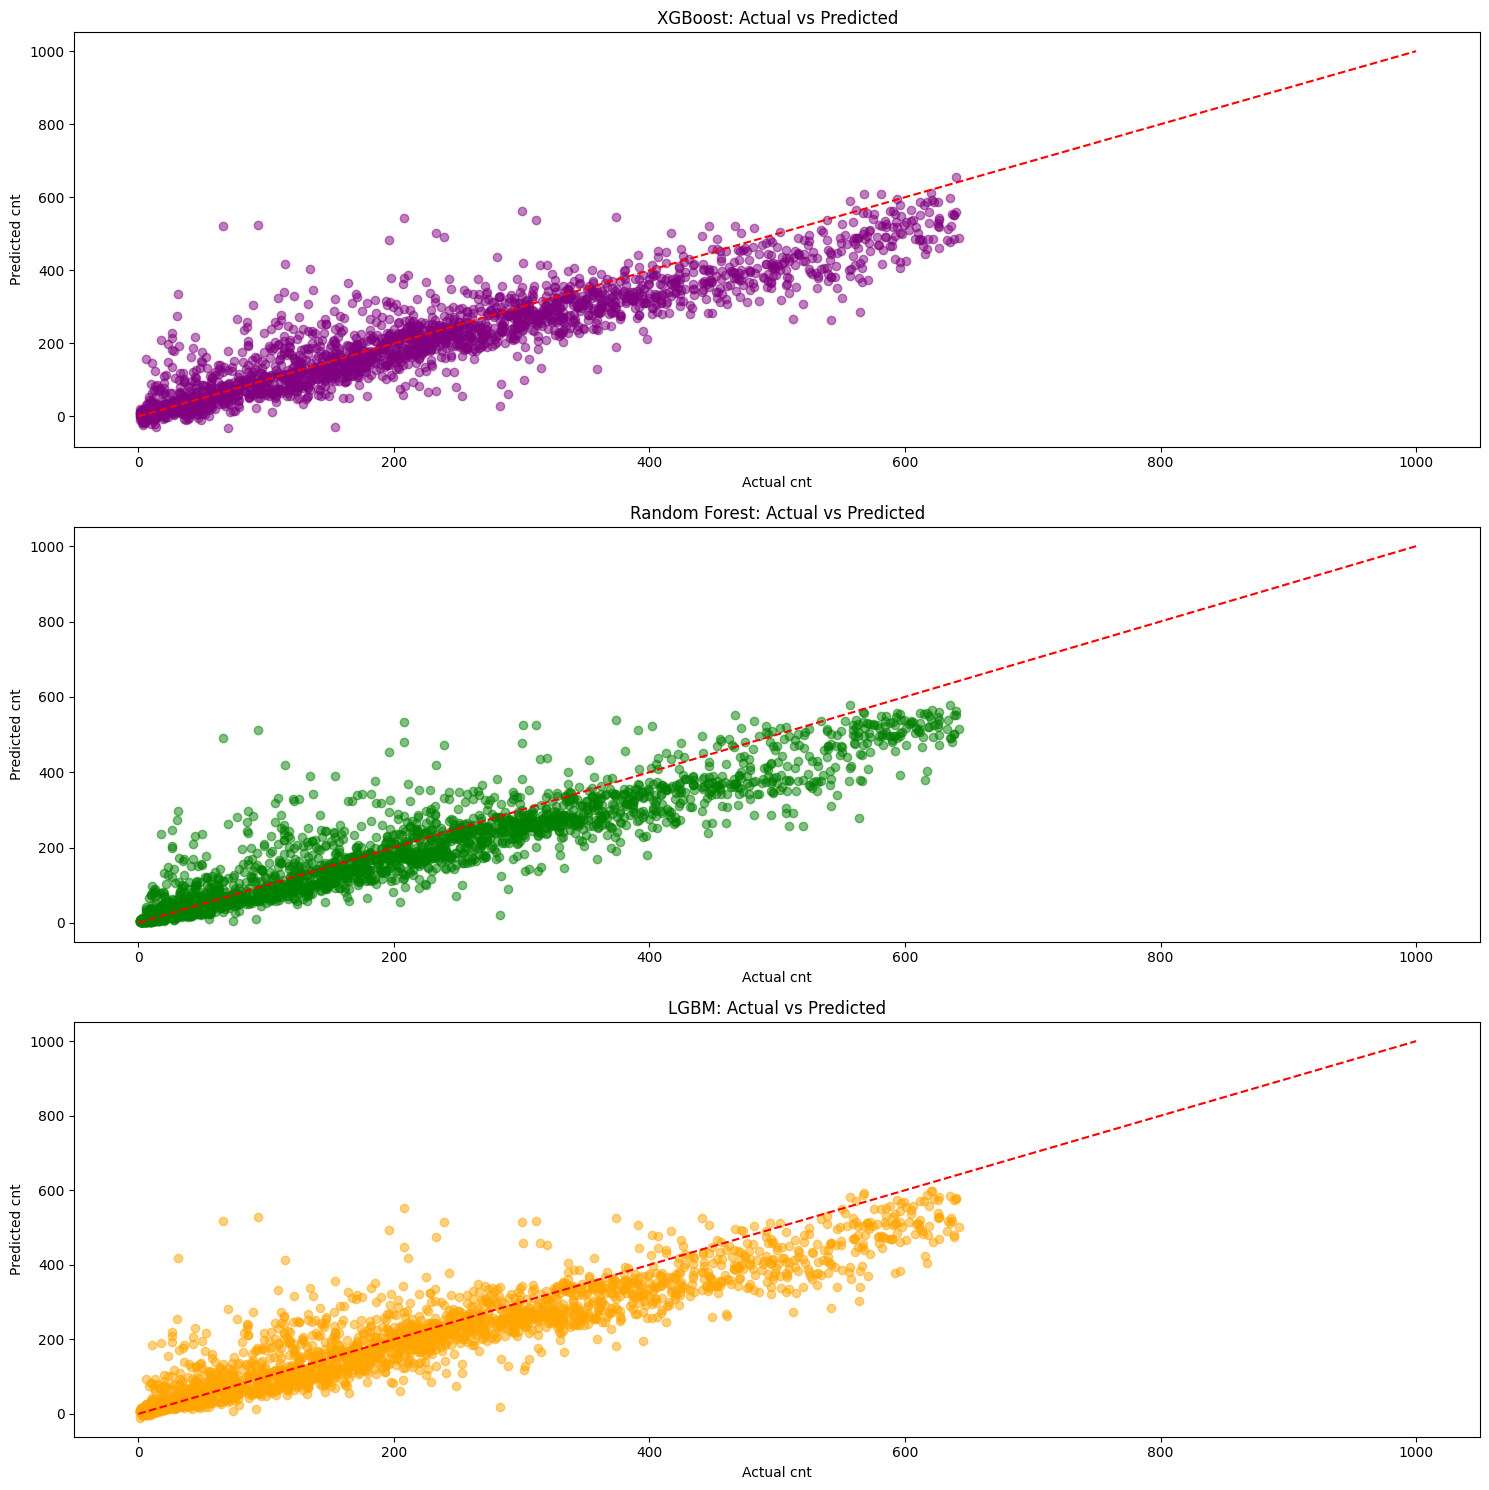

In [12]:
import matplotlib.pyplot as plt

# Dictionary of model names and predictions
models = {
    "XGBoost": (xgbr, 'purple'),
    "Random Forest": (rf, 'green'),
    "LGBM": (lgbm, 'orange')
}

# Predict and store predictions
predictions = {name: model.predict(X_test) for name, (model, _) in models.items()}

# Plot
plt.figure(figsize=(15, 15))

for i, (name, pred) in enumerate(predictions.items(), start=1):
    color = models[name][1]
    plt.subplot(len(models), 1, i)
    plt.scatter(y_test, pred, alpha=0.5, color=color)
    plt.plot([0, 1000], [0, 1000], 'r--')
    plt.title(f'{name}: Actual vs Predicted')
    plt.xlabel('Actual cnt')
    plt.ylabel('Predicted cnt')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint

# Expanded parameter grid
param_dists = {
    "Random Forest": {
        'n_estimators': randint(200, 800),
        'max_depth': [10, 20, 30, None],
        'min_samples_split': randint(2, 15),
        'min_samples_leaf': randint(1, 10),
        'max_features': ['sqrt', 'log2', None]
    },
    "XGBoost": {
        'n_estimators': randint(200, 700),
        'max_depth': randint(4, 12),
        'learning_rate': uniform(0.01, 0.1),
        'subsample': uniform(0.7, 0.3),
        'colsample_bytree': uniform(0.7, 0.3),
        'reg_alpha': uniform(0, 5),
        'reg_lambda': uniform(0, 5)
    },
    "LGBM": {
        'n_estimators': randint(200, 700),
        'max_depth': [-1, 10, 20],
        'learning_rate': uniform(0.01, 0.1),
        'num_leaves': randint(31, 150),
        'feature_fraction': uniform(0.7, 0.3),
        'reg_alpha': uniform(0, 5),
        'reg_lambda': uniform(0, 5)
    }
}

# Models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "LGBM": LGBMRegressor(random_state=42)
}

best_models = {}
n_iterations = 30  # More iterations for better tuning

for name, model in models.items():
    print(f"\nTuning {name} with RandomizedSearchCV ({n_iterations} iterations)...")
    random_search = RandomizedSearchCV(
        model,
        param_distributions=param_dists[name],
        n_iter=n_iterations,
        cv=5,
        scoring='r2',
        n_jobs=-1,
        random_state=42,
        verbose=0
    )
    random_search.fit(X_train, y_train)
    best_models[name] = random_search.best_estimator_
    print(f"Best Parameters for {name}:", random_search.best_params_)

# Evaluate models
print("\n--- Evaluation of Tuned Models (Randomized Search) ---\n")
best_tuned = []
for name, model in best_models.items():
    best_tuned.append(pd.DataFrame([evaluate_model(model, X_test, y_test, f"{name} (Tuned)")]))

best_tuned_df = pd.concat(best_tuned, ignore_index=True)
best_tuned_df.index = ['Random Forest (Tuned) Evaluation', 'XGBoost (Tuned) Evaluation', 'LGBM (Tuned) Evaluation']
best_tuned_df


Tuning Random Forest with RandomizedSearchCV (30 iterations)...


In [ ]:
import plotly.express as px

# Evaluation Function
def evaluate_model(model, X_test, y_test, label):
    y_pred = model.predict(X_test)
    return {
        "Model": label,
        "R2": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred)
    }

# Evaluate Default Models
default_results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    res = evaluate_model(model, X_test, y_test, f"{name} (Default)")
    default_results.append(res)

# Evaluate Tuned Models
tuned_results = []
for name, model in best_models.items():
    res = evaluate_model(model, X_test, y_test, f"{name} (Tuned)")
    tuned_results.append(res)

# Combine Results
all_results = pd.DataFrame(default_results + tuned_results)

# Plot R2, MAE, MSE Comparisons
metrics = ['R2', 'MAE', 'MSE']
for metric in metrics:
    fig = px.bar(
        all_results, x="Model", y=metric,
        color="Model", title=f"{metric} Comparison: Default vs Tuned",
        text_auto='.3s'
    )
    fig.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

def plot_actual_vs_predicted(models_dict, X_test, y_test, title_suffix=""):
    plt.figure(figsize=(14, 4))
    for i, (name, model) in enumerate(models_dict.items()):
        y_pred = model.predict(X_test)
        plt.subplot(1, len(models_dict), i + 1)
        sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title(f"{name} {title_suffix}")
    plt.tight_layout()
    plt.show()

# Usage
plot_actual_vs_predicted(models, X_test, y_test, "(Default)")
plot_actual_vs_predicted(best_models, X_test, y_test, "(Tuned)")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

colors = ['blue', 'green', 'purple']
color_index = 0

def plot_actual_vs_predicted_tuned(models_dict, X_test, y_test, title_suffix=""):
    global color_index  # Declare color_index as global
    plt.figure(figsize=(10, 4 * len(models_dict))) # Adjust figure size based on number of models
    for i, (name, model) in enumerate(models_dict.items()):
        y_pred = model.predict(X_test)
        current_color = colors[color_index % len(colors)]
        color_index += 1
        plt.subplot(len(models_dict), 1, i + 1) # Create subplots vertically
        sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color = current_color)
        # Plot a diagonal line for reference
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title(f"{name} {title_suffix}")
    plt.tight_layout()
    plt.show()

# Usage with your tuned models (assuming you ran the RandomizedSearchCV code and have best_models_random)
plot_actual_vs_predicted_tuned(best_models, X_test, y_test, "(Tuned)")

In [ ]:
# Recidual Plot representation
warnings.filterwarnings('ignore')

def plot_residuals(models_dict, X_test, y_test, title_suffix=""):
    plt.figure(figsize=(14, 4))
    for i, (name, model) in enumerate(models_dict.items()):
        y_pred = model.predict(X_test)
        residuals = y_test - y_pred
        plt.subplot(1, len(models_dict), i + 1)
        sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
        plt.axhline(0, color='r', linestyle='--') # Add a horizontal line at zero
        plt.xlabel("Predicted")
        plt.ylabel("Residuals")
        plt.title(f'{name} {title_suffix}: Residual Plot')
    plt.tight_layout()
    plt.show()

# Usage
plot_residuals(models, X_test, y_test, "(Default)")
plot_residuals(best_models, X_test, y_test, "(Tuned)")

In [ ]:
# Assuming 'season' is a valid column in your X_test DataFrame
group_col = 'season'

# Get predictions from the tuned models
y_pred_xgb_tuned = best_models["XGBoost"].predict(X_test)
y_pred_rf_tuned = best_models["Random Forest"].predict(X_test)
y_pred_lgbm_tuned = best_models["LGBM"].predict(X_test)

# Dictionary of tuned model predictions
tuned_predictions = {
    "XGBoost (Tuned)": y_pred_xgb_tuned,
    "Random Forest (Tuned)": y_pred_rf_tuned,
    "LGBM (Tuned)": y_pred_lgbm_tuned
}

# Calculate grouped errors for tuned models
grouped_errors_tuned = {
    name: np.abs(y_test - pred).groupby(X_test[group_col]).mean()
    for name, pred in tuned_predictions.items()
}

# Create DataFrame and plot heatmap for tuned models
df_grouped_tuned = pd.DataFrame(grouped_errors_tuned)
plt.figure(figsize=(10, 6))
sns.heatmap(df_grouped_tuned, annot=True, fmt=".1f", cmap="coolwarm")
plt.title(f"Mean Absolute Error by {group_col} (Tuned Models)")
plt.ylabel(group_col)
plt.xlabel("Model")
plt.show()

In [ ]:
# Sort by actual values for smooth lines
warnings.filterwarnings('ignore')

sorted_idx = np.argsort(y_test[:100])

# Get predictions from tuned models
y_pred_xgb_tuned = best_models["XGBoost"].predict(X_test[:100])
y_pred_rf_tuned = best_models["Random Forest"].predict(X_test[:100])
y_pred_lgbm_tuned = best_models["LGBM"].predict(X_test[:100])

plt.figure(figsize=(10, 6))
plt.plot(y_test.values[sorted_idx], label='Actual', color='black', linewidth=2)
plt.plot(y_pred_xgb_tuned[sorted_idx], label='XGBoost (Tuned)', linestyle='--', color='red')
plt.plot(y_pred_rf_tuned[sorted_idx], label='Random Forest (Tuned)', linestyle='--', color='green')
plt.plot(y_pred_lgbm_tuned[sorted_idx], label='LGBM (Tuned)', linestyle='--', color='orange')
plt.title('Actual vs Predicted (Sorted by Actual - Tuned Models)')
plt.xlabel('Sample Index')
plt.ylabel('cnt')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)